In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files


uploaded = files.upload()

Saving customer_churn_large_dataset - Copy.csv to customer_churn_large_dataset - Copy.csv


In [5]:
df=pd.read_csv("customer_churn_large_dataset - Copy.csv")

In [6]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# 1. Data Preprocessing


In [7]:
# shape of data
df.shape

(100000, 9)

In [8]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [9]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

**All varibles have correct data type.**

In [10]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#### **Age**

- **Here mean age value is 44.027020. i.e. Average age of the customers are near about 44 years old.**
- **The standard deviation of the age is 15 years.**
- **The age of youngest person is 18 years old.**
- **Most of the Customers are between the ages of 31 and 57.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


## 1.1 Handle Missing data and outlier

In [12]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**No null values are present in the dataset**

In [13]:
y = df.iloc[:,8]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [14]:
X = df.iloc[:,2:8]
X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266


# Feature Engineering

<Axes: ylabel='count'>

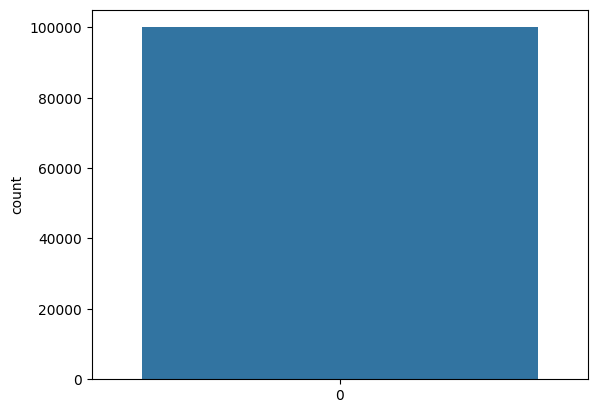

In [15]:
sns.countplot(y)

In [16]:
import matplotlib.pyplot as plt

In [17]:
y.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

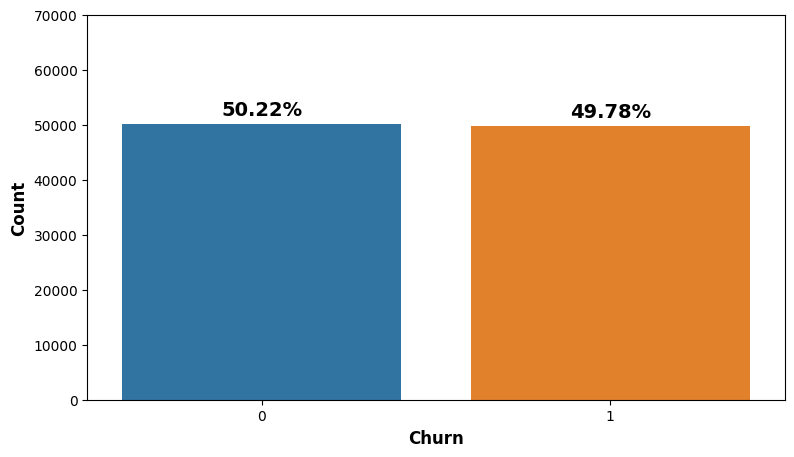

In [18]:
f, axe = plt.subplots( figsize=(9,5))

sns.countplot(x=y,  ax=axe)

axe.set_ylabel('Count', size=12, weight='bold')
axe.set_xlabel('Churn', size=12, weight='bold')
axe.set_ylim([0, 70000])
#axe.set_yticks(np.arange(0, 1.1, 0.25))


for index, value in enumerate(y.value_counts()):
    label = '{}%'.format(round((value / y.shape[0]) * 100, 2))
    #print(label)
    #print(value)
    axe.annotate(label,
            xy=(index, value + 2500),
            ha='center',
            va='center',
            color='black',
            fontweight='bold',
            size=14)

plt.show()

**Here, our dataset is quite balanced. Not churned value is 50.22% and churned value is 49.78%**

In [19]:
sns.countplot(X['Location'],palette='pastel')

ValueError: ignored

Female    50216
Male      49784
Name: Gender, dtype: int64


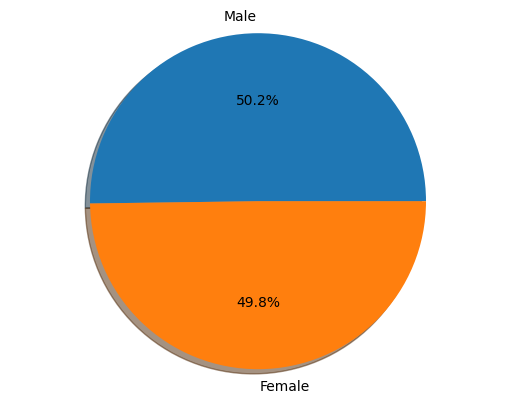

In [20]:
labels = ['Male','Female']
sizes = X['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: xlabel='Location', ylabel='Churn'>

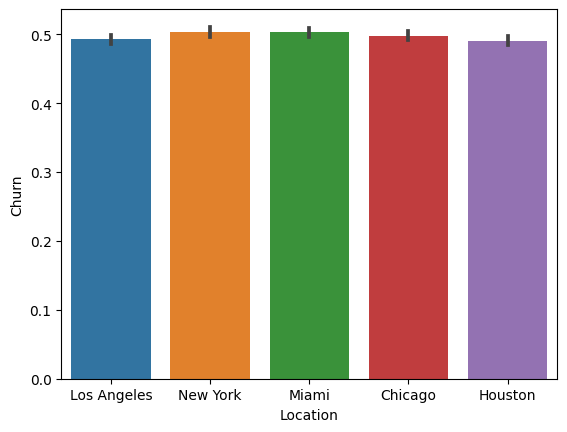

In [21]:
sns.barplot(x='Location', y='Churn', data=df)

<Axes: xlabel='Gender', ylabel='Churn'>

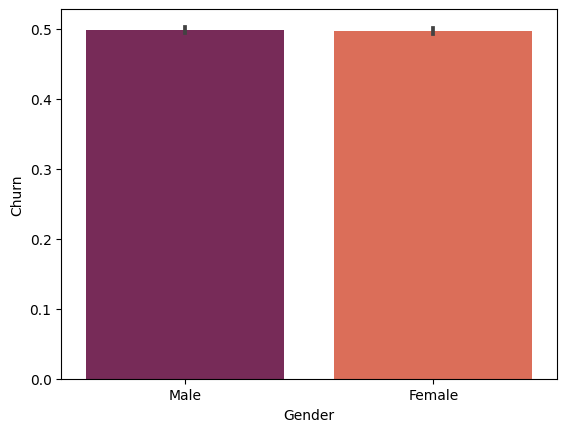

In [22]:
sns.barplot(x='Gender', y='Churn', data=df,palette='rocket')

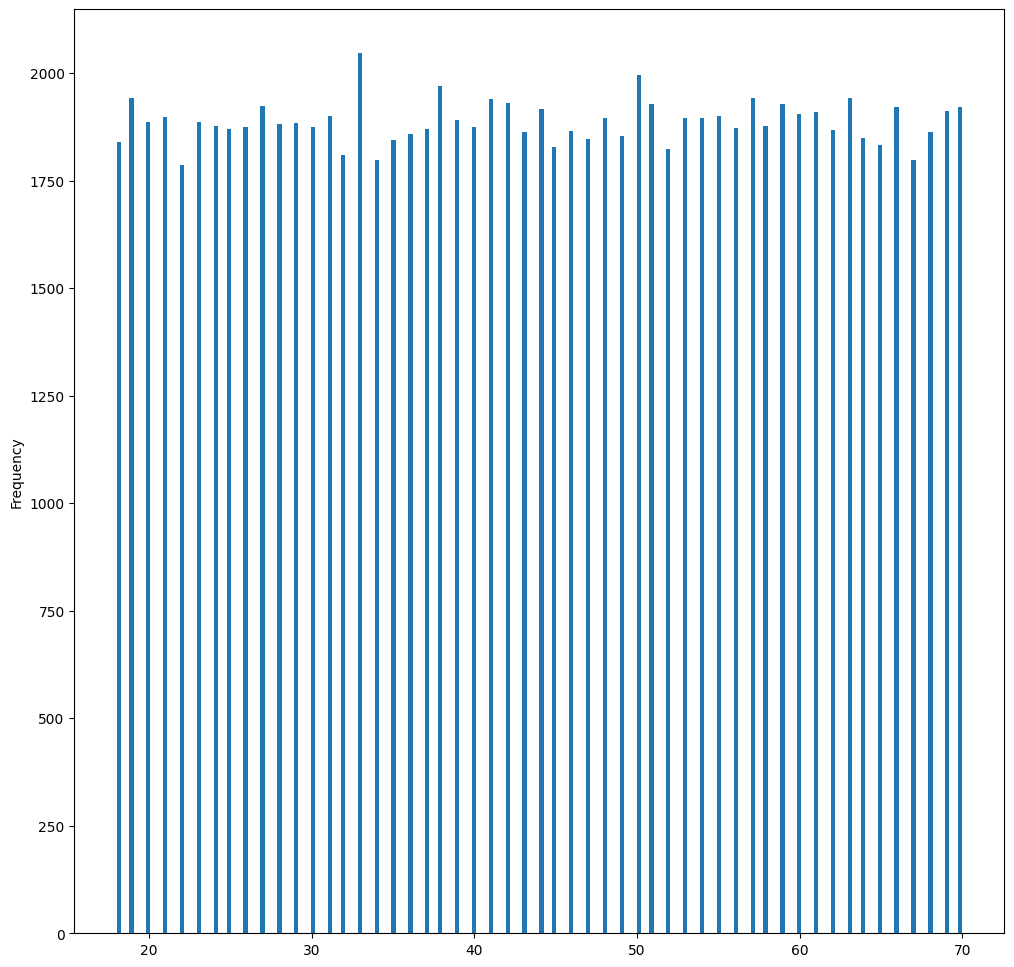

In [23]:
df.Age.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()

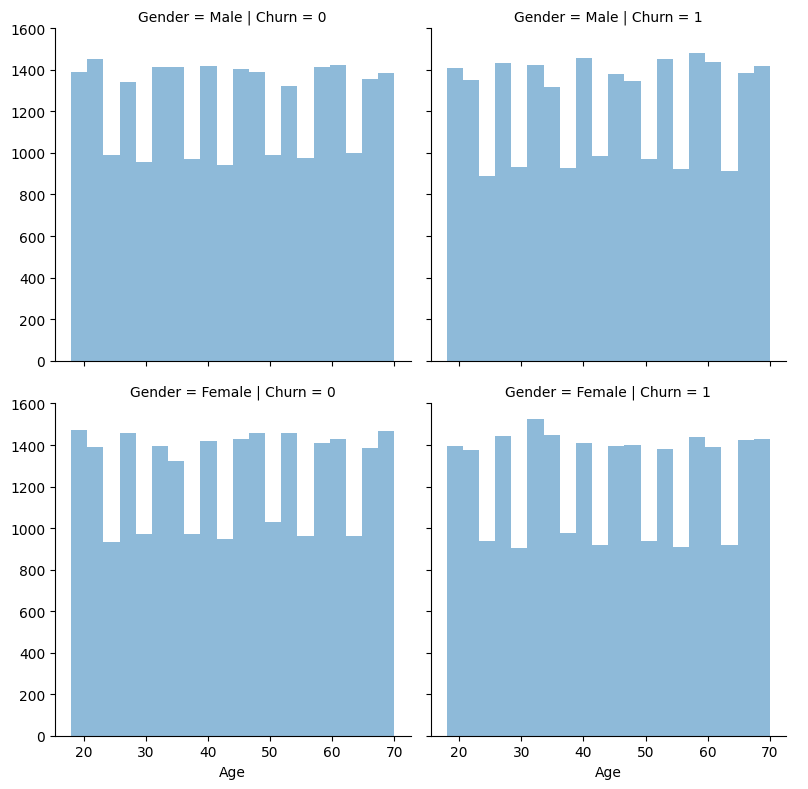

In [24]:
g = sns.FacetGrid(df, row='Gender', col='Churn', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

#### Distribution of Continuous value

In [25]:
continuous = ['Age', 'Subscription_Length_Months', 'Monthly_Bill','Total_Usage_GB']
categorical = ['Location','Gender', 'Churn']

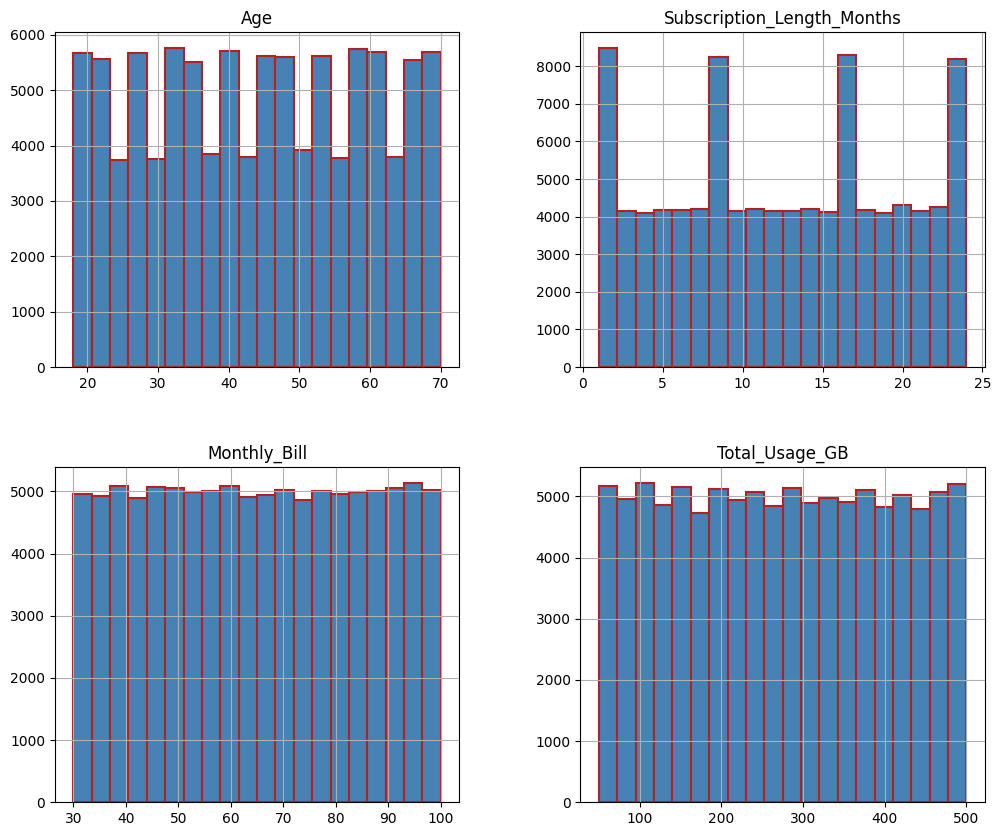

In [26]:
df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

**All variables are approx normally distributed.**

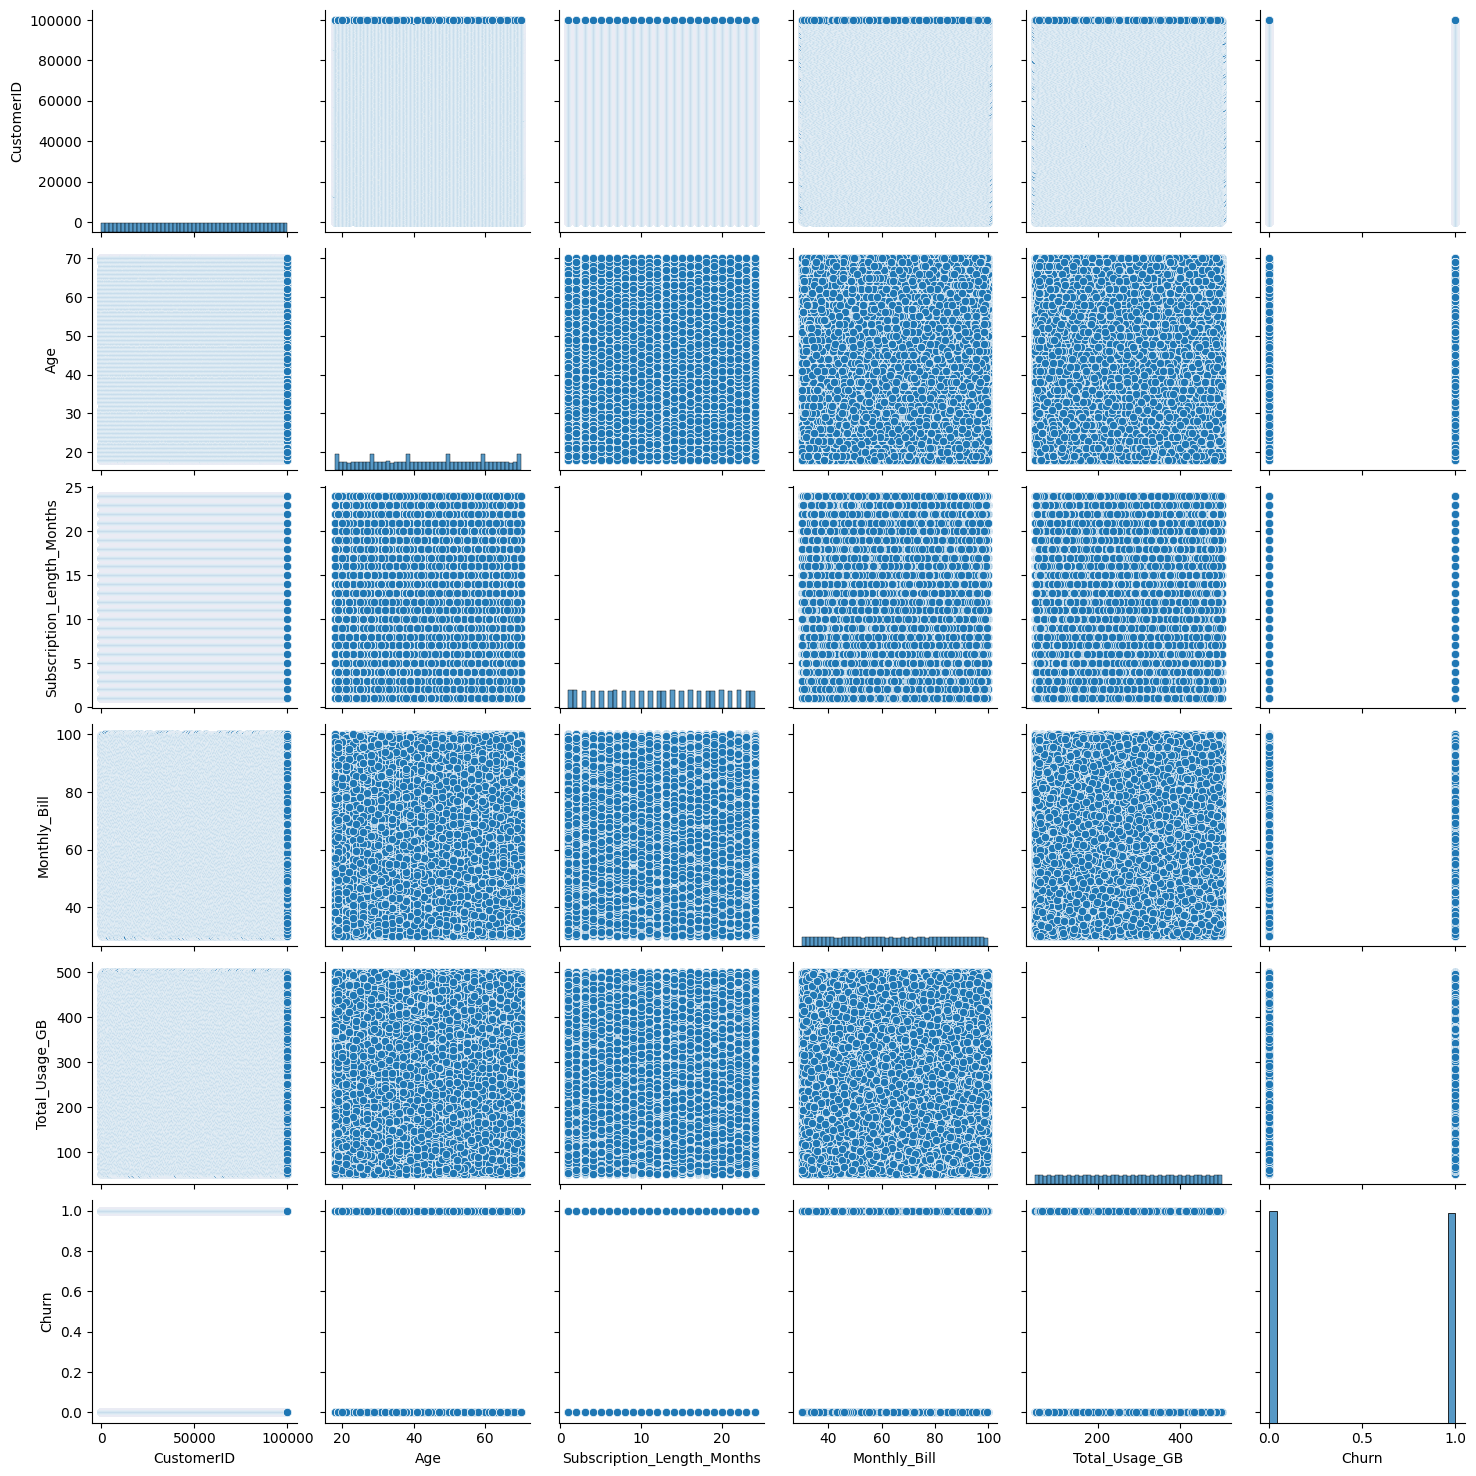

In [27]:
sns.pairplot(df)

In [28]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(7))

0    1
1    0
2    0
3    0
4    0
5    1
6    0
Name: Gender, dtype: int64


In [29]:
X['Location']=label.fit_transform(X['Location'])
print(X['Location'].head())
X['Location'].value_counts()

0    2
1    4
2    2
3    3
4    3
Name: Location, dtype: int64


1    20157
2    20041
3    20031
0    19958
4    19813
Name: Location, dtype: int64

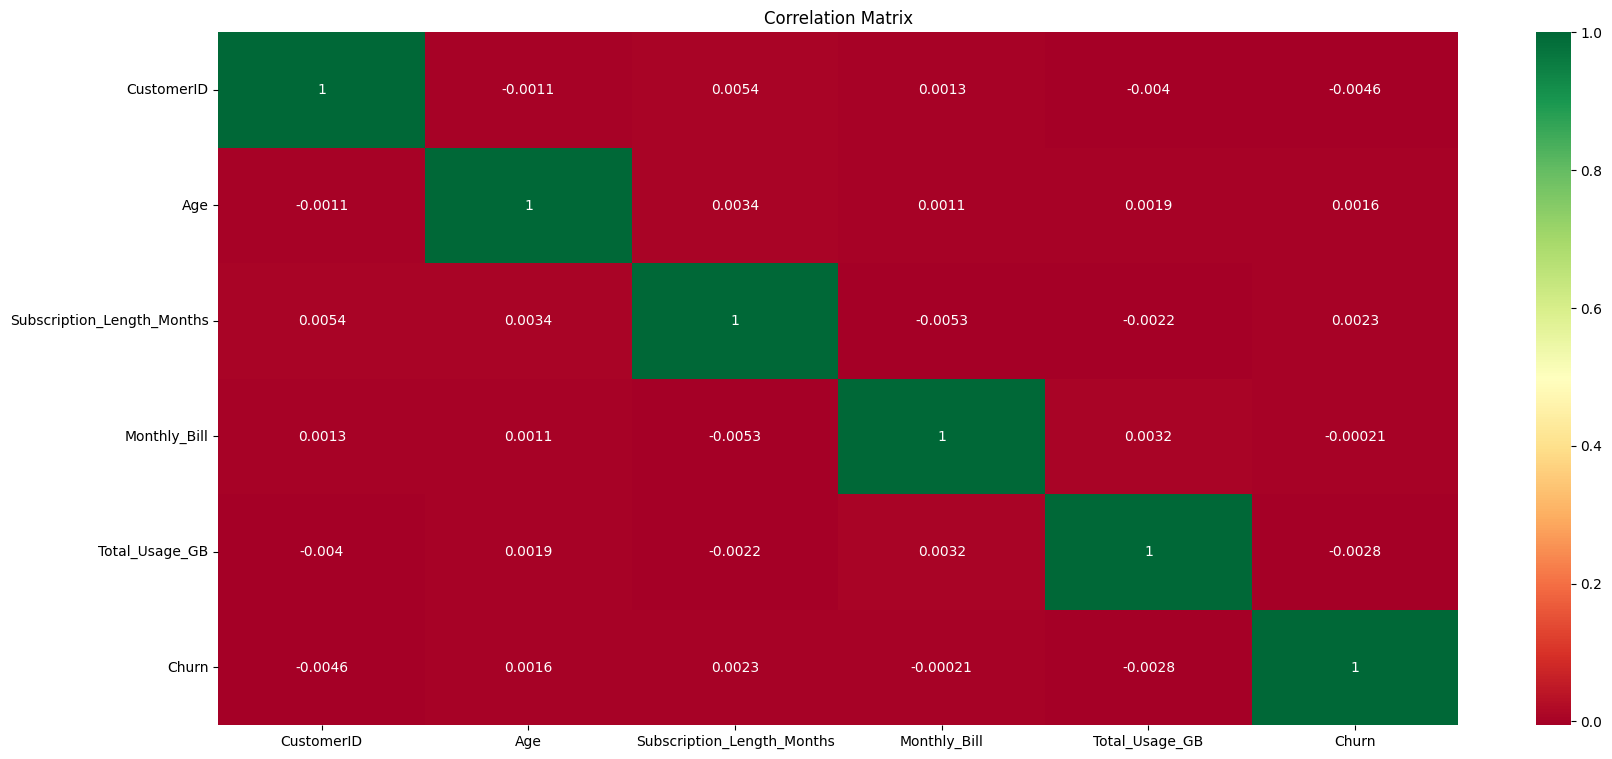

In [30]:
# Plotting The Correlations between all the features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,9))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

**There is no high correlation between any pairs of features**

In [31]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


## Numerical variable

In [32]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >7
                        and col not in "CustomerId"]
numeric_variables

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB']

## categorical variable

In [33]:
categorical_variables = [col for col in df.columns if df[col].dtype=="object"
                        or df[col].nunique() <=7
                        and col not in "churn"]

categorical_variables

['Name', 'Gender', 'Location', 'Churn']

### Check Outliers


In [34]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [35]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [36]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CustomerID has  None Outliers
Age has  None Outliers
Subscription_Length_Months has  None Outliers
Monthly_Bill has  None Outliers
Total_Usage_GB has  None Outliers


In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Country column
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

# Male/Female
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])


In [38]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [39]:
#Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80000, 7) (80000,)
Test set: (20000, 7) (20000,)


In [40]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
print(X_train)

[[ 0.99553497 -0.99553497  0.65344669 ... -1.08272837  0.96025455
  -0.53377381]
 [-1.00448506  1.00448506 -1.04827574 ...  1.66388226  0.83962354
  -0.27325726]
 [-1.00448506  1.00448506  0.84979927 ... -0.07081919 -0.63217363
  -1.62947581]
 ...
 [-1.00448506  1.00448506  1.63520963 ... -1.51640373  0.55188892
   0.35504739]
 [-1.00448506  1.00448506  0.71889755 ... -0.07081919  1.19212316
   0.30907388]
 [ 0.99553497 -0.99553497 -1.17917747 ...  0.65197308  0.26365992
   0.46231891]]


In [42]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [43]:
print(model.feature_importances_)

[0.00691515 0.00693346 0.22366402 0.02693406 0.17467587 0.2836875
 0.27718994]


# 2.Model Building

## 2.1 Random Forest

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
RF_y_pred = rf.predict(X_test)

In [46]:

RF_cm = confusion_matrix(y_test,RF_y_pred)
print(RF_cm )


[[5214 4865]
 [5247 4674]]


In [47]:
RF_accuracy=accuracy_score(y_test,RF_y_pred)
print(RF_accuracy)

0.4944


In [49]:
print(classification_report(y_test,RF_y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



## 2.2 KNN Classifier

In [50]:
#Train Model
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

In [51]:
#Prediction
KNN_y_pred = neigh.predict(X_test)

In [52]:

KNN_cm = confusion_matrix(y_test,KNN_y_pred)
print(KNN_cm )


[[6933 3146]
 [6891 3030]]


In [53]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

NameError: ignored

In [54]:
#Accuracy
KNN_accuracy=accuracy_score(y_test,KNN_y_pred)
print(KNN_accuracy)

0.49815


## Decision Tree

In [55]:
#Using DecisionTreeClassifier

TeleTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [56]:
TeleTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [57]:
DT_y_pred = TeleTree.predict(X_test)

In [58]:
prediction4=pd.DataFrame(DT_y_pred)
prediction4.head()

,0
0,0
1,1
2,1
3,1
4,0


In [59]:

DT_cm = confusion_matrix(y_test,DT_y_pred)
print(DT_cm )

[[5264 4815]
 [5096 4825]]


In [60]:
#Accuracy
DT_accuracy=accuracy_score(y_test,DT_y_pred)
print(DT_accuracy)

0.50445


In [61]:
# Calculate recall for the test set
test_recall = recall_score(y_test, DT_y_pred)
print("Test Recall:", test_recall)

Test Recall: 0.48634210261062394


## 2.3 SVM Classifier

In [62]:
# Now Using SVM Algorithm

classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [63]:
#Predict
SVM_y_pred=classifier.predict(X_test)

In [64]:
prediction2=pd.DataFrame(SVM_y_pred)
prediction2.head()

,0
0,0
1,1
2,0
3,1
4,1


In [65]:

SVM_cm = confusion_matrix(y_test,SVM_y_pred)
print(SVM_cm )

[[6043 4036]
 [5943 3978]]


In [66]:
#Accuracy
SVM_accuracy=accuracy_score(y_test,SVM_y_pred)
print(SVM_accuracy)

0.50105


## Accuracy of All Models

In [67]:
models = pd.DataFrame({'Model_Name':["KNN","SVM","Random Forest","Decision Trees"],\
                        'Accuracy':[KNN_accuracy,SVM_accuracy,RF_accuracy,DT_accuracy]})

In [68]:
models

,Model_Name,Accuracy
0,KNN,0.49815
1,SVM,0.50105
2,Random Forest,0.49440
3,Decision Trees,0.50445


In [69]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)

## Model Optimization

### Cross-Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
# Create a decision tree classifier
DT_cv = DecisionTreeClassifier()

In [72]:
# Use cross-validation to evaluate the model
DT_cv_scores = cross_val_score(DT_cv, X_train, y_train, cv=5)
print("Cross-validation scores:", DT_cv_scores)
print("Cross-validation scores (Mean):", DT_cv_scores.mean())

Cross-validation scores: [0.50225   0.499     0.5035    0.501375  0.5011875]
Cross-validation scores (Mean): 0.5014624999999999


### Hyperparameter Tuning

#### 1. Decision Tree Classifier with hyperparameter Tuning with different parameters

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
params1 = {'criterion':['entropy','gini'],'max_depth': [3, 4, 5],'max_leaf_nodes': list(range(1, 29)), 'min_samples_split': [2, 3, 4]}


In [74]:
grid_search_cv1 = GridSearchCV(DecisionTreeClassifier(random_state=42), params1, verbose=1, cv=3)
grid_search_cv1.fit(X_train, y_train)

Fitting 3 folds for each of 504 candidates, totalling 1512 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [75]:
grid_search_cv1.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 10,
 'min_samples_split': 2}

In [76]:
grid_search_cv1.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, random_state=42)

In [78]:
grid_search_cv1.best_score_

0.5040500131264297

In [79]:
# Make predictions on the test set using the best model
DT_y_test_pred = grid_search_cv1.predict(X_test)

# Calculate recall for the test set
test_recall1 = recall_score(y_test, DT_y_test_pred)

print("Best Parameters:", grid_search_cv1.best_params_)
print("Test Recall with Best Model:", test_recall1)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 2}
Test Recall with Best Model: 0.5354298961798206


#### **The performance of the Decision Tree classifier model did not improve after hyperparameter tuning. But improved in the Test Recall with best model. Still, I will use Decision Tree classifier with cross-validation.**

#### 2. Decision Tree Classifier with hyperparameter Tuning with different parameters

In [81]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [82]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=18, random_state=42)

In [83]:
grid_search_cv.best_params_

{'max_leaf_nodes': 18, 'min_samples_split': 2}

In [84]:
grid_search_cv.best_score_

0.5041000256266016

# Decision Tree Model Evaluation

In [85]:
DT_y_train_pred2 = TeleTree.predict(X_train)
DT_y_test_pred2 = TeleTree.predict(X_test)

# Calculate metrics for train set
train_accuracy2 = accuracy_score(y_train, DT_y_train_pred2)
train_precision2 = precision_score(y_train, DT_y_train_pred2)
train_recall2 = recall_score(y_train,DT_y_train_pred2)
train_f12 = f1_score(y_train, DT_y_train_pred2)

# Calculate metrics for test set
test_accuracy2 = accuracy_score(y_test, DT_y_test_pred2)
test_precision2 = precision_score(y_test, DT_y_test_pred2)
test_recall2 = recall_score(y_test, DT_y_test_pred2)
test_f12 = f1_score(y_test, DT_y_test_pred2)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy2, train_precision2, train_recall2, train_f12],
    'Test': [test_accuracy2, test_precision2, test_recall2, test_f12]
})

results

,Metric,Train,Test
0,Accuracy,0.508650,0.504450
1,Precision,0.507034,0.500519
2,Recall,0.497341,0.486342
3,F1-Score,0.502140,0.493329


In [86]:
# Calculate evaluation metrics for train data
train_accuracy3 = accuracy_score(y_train, DT_y_train_pred)
train_precision3 = precision_score(y_train, DT_y_train_pred, average='macro')
train_recall3 = recall_score(y_train, DT_y_train_pred, average='macro')
train_f1_score3 = f1_score(y_train, DT_y_train_pred, average='macro')

# Predict on the test data
y_test_pred3 = TeleTree.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy3 = accuracy_score(y_test, y_test_pred3)
test_precision3 = precision_score(y_test, y_test_pred3, average='macro')
test_recall3 = recall_score(y_test, y_test_pred3, average='macro')
test_f1_score3 = f1_score(y_test, y_test_pred3, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy3, test_accuracy3],
    'Precision': [train_precision3, test_precision3],
    'Recall': [train_recall3, test_recall3],
    'F1-score': [train_f1_score3, test_f1_score3]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

NameError: ignored

#### After tuning

In [87]:
DT_y_train_pred4 = grid_search_cv1.predict(X_train)
DT_y_test_pred4 = grid_search_cv1.predict(X_test)

# Calculate metrics for train set
train_accuracy4 = accuracy_score(y_train, DT_y_train_pred4)
train_precision4 = precision_score(y_train, DT_y_train_pred4)
train_recall4 = recall_score(y_train,DT_y_train_pred4)
train_f14 = f1_score(y_train, DT_y_train_pred4)

# Calculate metrics for test set
test_accuracy4 = accuracy_score(y_test, DT_y_test_pred4)
test_precision4 = precision_score(y_test, DT_y_test_pred4)
test_recall4 = recall_score(y_test, DT_y_test_pred4)
test_f14 = f1_score(y_test, DT_y_test_pred4)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy4, train_precision4, train_recall4, train_f14],
    'Test': [test_accuracy4, test_precision4, test_recall4, test_f14]
})

results

,Metric,Train,Test
0,Accuracy,0.509350,0.502650
1,Precision,0.507004,0.498779
2,Recall,0.550304,0.535430
3,F1-Score,0.527767,0.516455


In [88]:
# Calculate evaluation metrics for train data
train_accuracy5 = accuracy_score(y_train, DT_y_train_pred4)
train_precision5 = precision_score(y_train, DT_y_train_pred4, average='macro')
train_recall5 = recall_score(y_train, DT_y_train_pred4, average='macro')
train_f1_score5 = f1_score(y_train, DT_y_train_pred4, average='macro')

# Predict on the test data
y_test_pred5 = grid_search_cv1.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy5 = accuracy_score(y_test, y_test_pred5)
test_precision5 = precision_score(y_test, y_test_pred5, average='macro')
test_recall5 = recall_score(y_test, y_test_pred5, average='macro')
test_f1_score5 = f1_score(y_test, y_test_pred5, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data5 = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy5, test_accuracy5],
    'Precision': [train_precision5, test_precision5],
    'Recall': [train_recall5, test_recall5],
    'F1-score': [train_f1_score5, test_f1_score5]
}

metrics_df5 = pd.DataFrame(metrics_data5)
metrics_df5

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.50935,0.509558,0.509495,0.508603
1,Test,0.50265,0.502919,0.502907,0.502244


**Conclusion:**
    - After model evaluation we concluded that the decision tree classifier is the best model for Churn prediction. Here, we found the classification reports before the parameter tuning and after the parameter tuning. From that, we got the best metrics values for training dataset by using the Decision Tree classifier without hyperparameter tuning but the testing data set best metrics values have got by using decision tree classifier with hyperparameter tuning.

In [89]:
import pickle

In [90]:
# Decision tree without hyperparameter tuning
# save the model to disk
filename1 = 'finalized_model1.sav'
pickle.dump(TeleTree, open(filename1, 'wb'))

# some time later...

# load the model from disk
loaded_model1 = pickle.load(open(filename1, 'rb'))
result1 = loaded_model1.score(X_test, y_test)
print(result1)

0.50445


In [91]:
# Decision tree with hyperparameter tuning
# save the model to disk
filename2 = 'finalized_model2.sav'
pickle.dump(grid_search_cv1, open(filename2, 'wb'))

# some time later...

# load the model from disk
loaded_model2 = pickle.load(open(filename2, 'rb'))
result2 = loaded_model2.score(X_test, y_test)
print(result2)

0.50265
